In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import pickle

In [2]:
cross_df = pd.read_csv('oasis_cross-sectional.csv')

In [3]:
long_df = pd.read_csv("oasis_longitudinal.csv")

In [4]:
long_df.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
cross_df.head(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [6]:
a = long_df.iloc[:,1]

In [7]:
b = cross_df[cross_df['ID'].isin([a])]
b
#Cross sectional data and longitudinal data are not related

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay


## Longitudinal data set into consideration

In [8]:
long_df = long_df.drop("Subject ID",axis = 1)
long_df = long_df.drop("MRI ID",axis =1)
#dropping Hand column
long_df=long_df.drop("Hand",axis=1)
import matplotlib.pyplot as plt

In [9]:
#removing NaN values
long_df.SES = long_df.SES.fillna(round(long_df.SES.mean()))

In [10]:
long_df.MMSE = long_df.MMSE.fillna(round(long_df.MMSE.mean()))
long_df['Group'] = long_df['Group'].replace('Converted','Demented') 
#creating dummy variables
long_df = pd.get_dummies(data= long_df,columns = {'Group','M/F'})
long_df = long_df.rename(columns={'M/F_F':'Female','M/F_M':'Male','Group_Demented':'Demented','Group_Nondemented':'Non-Demented'})
#Male=1 and Female=0
long_df=long_df.drop("Female",axis=1)
long_df = long_df.rename(columns={"Male":"Gender"})
#Demented=1 and Non-demented=0
long_df = long_df.drop("Non-Demented",axis=1)
long_df = long_df.rename(columns={"Demented":"Group"})

## Exploratory Data Analysis

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,10

In [12]:
def bar_graph(X):
    demented = long_df[long_df['Group']==1][X].value_counts()
    non_demented = long_df[long_df['Group']==0][X].value_counts()
    bar_df = pd.DataFrame([demented,non_demented])
    bar_df =bar_df.rename(columns={0:'Female',1:'Male'})
    bar_df.index = ['Demented','Non-demented']
    bar_df.plot(kind="bar",stacked="true")
    

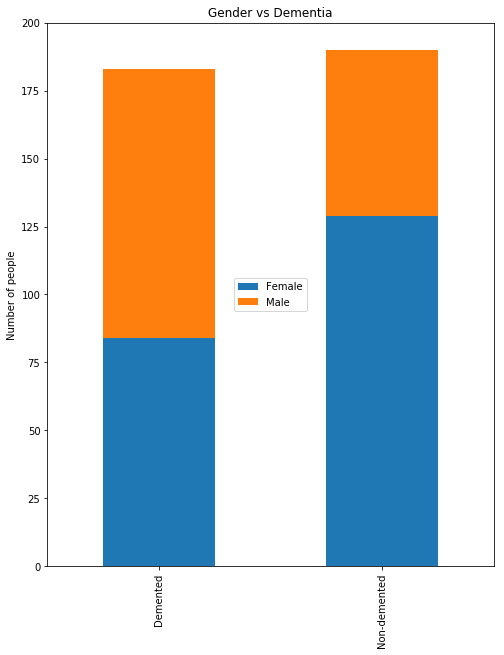

In [13]:
bar_graph('Gender')
plt.title("Gender vs Dementia")
plt.ylim(0,200,10)
plt.ylabel('Number of people')
plt.legend(loc="center")
plt.show()

In [14]:
rcParams['figure.figsize'] = 10,10

In [15]:
def box_graph(X):
    demented = long_df[long_df['Group']==1][X]
    non_demented = long_df[long_df['Group']==0][X]
    box_data = [demented,non_demented]
    plt.boxplot(box_data,patch_artist=True,labels=['Demented','Non-demented'],widths = (0.5,0.5),vert=False,showfliers=False)

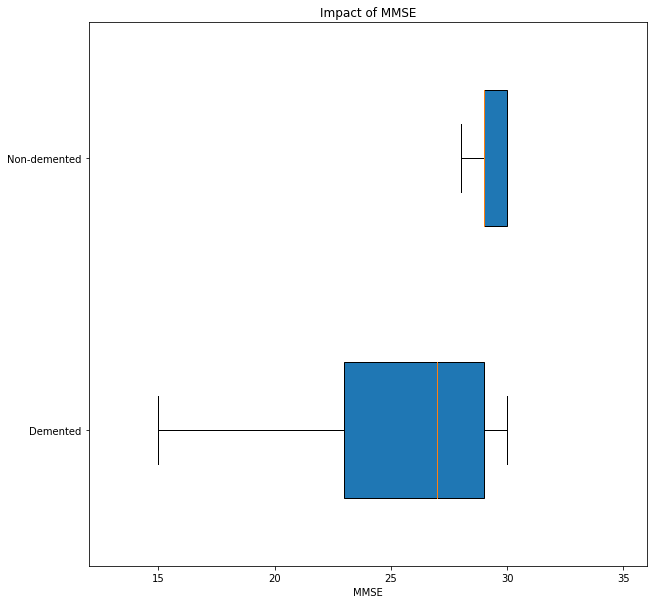

In [16]:
box_graph('MMSE')
plt.xlim(12,36,2)
plt.xlabel('MMSE')
plt.title('Impact of MMSE')
plt.show()

In [17]:
def violin_graph(X):
    w=long_df['Group'].replace([0,1],['Non-demented','Demented'])
    y=long_df[X] 
    violin_df=pd.DataFrame([w,y]).T
    sb.violinplot(x=y, y=w,data=violin_df,palette='rainbow',linewidth=3, orient='h')    
      

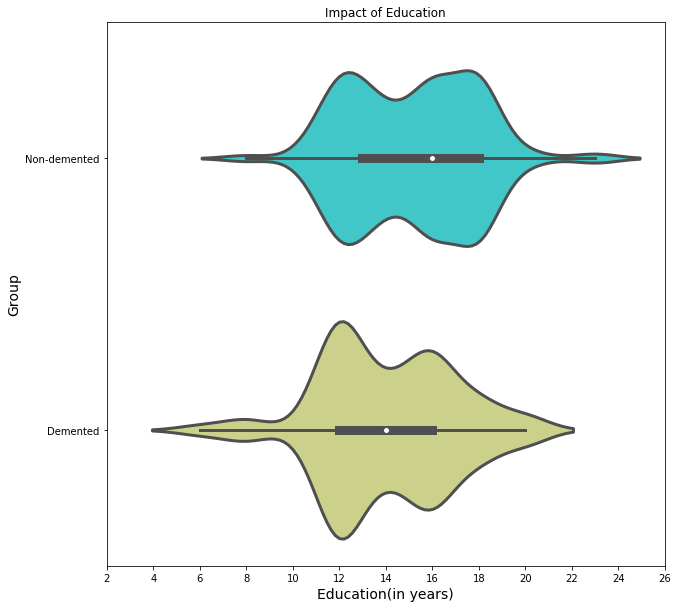

In [18]:
violin_graph('EDUC')
plt.xlabel("Education(in years)",fontsize=14)
plt.ylabel("Group",fontsize = 14)
plt.xticks(np.arange(2,28,2))
plt.title("Impact of Education")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(long_df) 
X = scaler.transform(long_df);X

/Users/akshayd/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/akshayd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.95706686, -0.93771494,  1.30873772, ..., -2.2657425 ,
        -0.98140608,  1.15379808],
       [ 0.12799678, -0.21761337,  1.43978716, ..., -2.31650145,
        -0.98140608,  1.15379808],
       [-0.95706686, -0.93771494, -0.26385558, ..., -1.08378418,
         1.0189462 ,  1.15379808],
       ...,
       [-0.95706686, -0.93771494, -2.09854775, ...,  0.98283006,
        -0.98140608, -0.86670278],
       [ 0.12799678,  0.2645553 , -1.83644887, ...,  0.92481984,
        -0.98140608, -0.86670278],
       [ 1.21306043,  1.59603414, -1.57434999, ...,  0.88131217,
        -0.98140608, -0.86670278]])

In [20]:
y = long_df['Group']
x_pca = long_df[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV',
       'nWBV', 'ASF', 'Gender']]

In [21]:
#applying PCA to training features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_pca) 
X = scaler.transform(x_pca);X

/Users/akshayd/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/akshayd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[ 1.30873772, -0.20813199, -0.3944662 , ..., -0.90516867,
        -2.2657425 ,  1.15379808],
       [ 1.43978716, -0.20813199, -0.3944662 , ..., -1.30964265,
        -2.31650145,  1.15379808],
       [-0.26385558, -0.90439416, -0.3944662 , ...,  0.17342861,
        -1.08378418,  1.15379808],
       ...,
       [-2.09854775, -0.55626308, -0.3944662 , ...,  1.92614919,
         0.98283006, -0.86670278],
       [-1.83644887, -0.55626308, -0.3944662 , ...,  1.79132453,
         0.92481984, -0.86670278],
       [-1.57434999, -0.55626308, -0.3944662 , ...,  1.92614919,
         0.88131217, -0.86670278]])

array([34.6, 56.2])

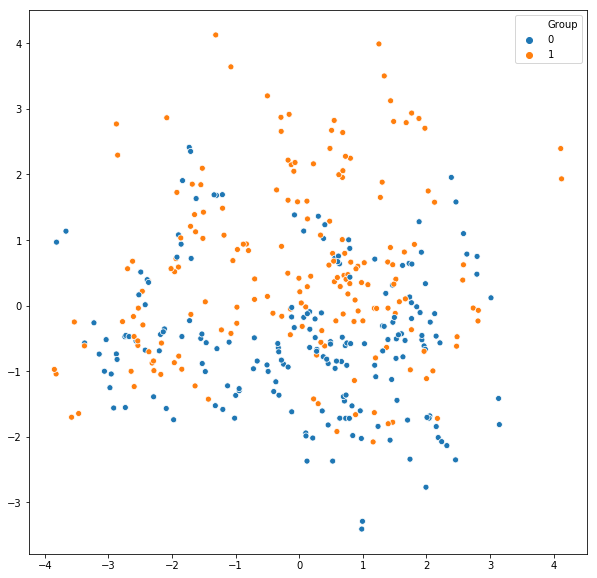

In [52]:
#plotting of top two components of pca to explain linear separability of two components through the plotting
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 2)
yoyo= covar_matrix.fit_transform(X)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
sb.scatterplot(x=yoyo[:,0],y=yoyo[:,1],hue=y)
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

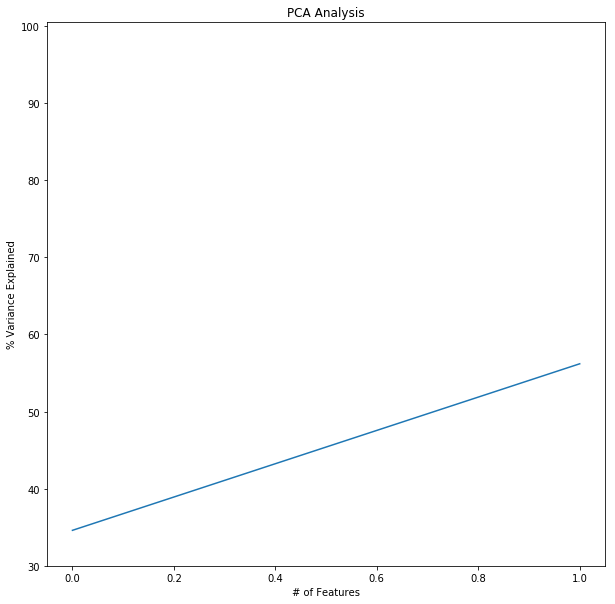

In [23]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

## Splitting Data into train and test sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
long_df.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Group', 'Gender'],
      dtype='object')

In [26]:
columns = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV',
       'nWBV', 'ASF', 'Gender']

In [27]:
def split_data():
    y = long_df['Group']
    x = long_df[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV',
       'nWBV', 'ASF', 'Gender']]
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state = 0)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,Y_train,Y_test

In [28]:
X_train,X_test,Y_train,Y_test = split_data()

/Users/akshayd/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/akshayd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/Users/akshayd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc,precision_score
compare=[]

In [30]:
    LogModel = LogisticRegression(solver='lbfgs').fit(X_train,Y_train)#vanilla logistic regression
    Y_predicted = LogModel.predict(X_test)
    acc = accuracy_score(Y_test,Y_predicted)
    recall = recall_score(Y_test,Y_predicted,pos_label=1)
    fpr, tpr, thresholds = roc_curve(Y_test,Y_predicted,pos_label=1)
    AUC = auc(fpr,tpr)
    compare.append(['Logistic Regression',acc,recall,AUC,fpr,tpr,thresholds])
    compare
#Explain the coefficients and results
#explain vs predict

[['Logistic Regression',
  0.8125,
  0.8113207547169812,
  0.8124400383754398,
  array([0.        , 0.18644068, 1.        ]),
  array([0.        , 0.81132075, 1.        ]),
  array([2, 1, 0])]]

### CDR(Clinical dementia rating)

CDR is solely responsible to say about the rating of dementia. Hence do not take the feature into account.

In [31]:
LogModel.intercept_

array([0.55181797])

In [32]:
#add the regression coefficients(how much impact the outputs have on the features)
LogModel.coef_.T

array([[-0.43094367],
       [-0.58907917],
       [-0.46104339],
       [-2.21694959],
       [-0.59097374],
       [-1.00121387],
       [-0.1122908 ],
       [ 0.65361008]])

In [33]:
np.array([columns]).T

array([['Age'],
       ['EDUC'],
       ['SES'],
       ['MMSE'],
       ['eTIV'],
       ['nWBV'],
       ['ASF'],
       ['Gender']], dtype='<U6')

In [34]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns]).T, LogModel.coef_.T)), 
                                columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,Gender,0.653610
6,ASF,-0.112291
0,Age,-0.430944
2,SES,-0.461043
1,EDUC,-0.589079
4,eTIV,-0.590974
5,nWBV,-1.001214
3,MMSE,-2.216950


## Interpretation of reg coefficients(in terms of odd ratios)

Keeping everything else constant, The odds of men getting dementia as compared to women is exp(0.716563)=2.04
times more.

All else being constant, if a person gets older by a year, the probability that the person will get dementia 
increases by 1/(1+exp(-(-0.452391+0.62704977))= 54.36%


Text(0.5, 1.0, 'Confusion Matrix')

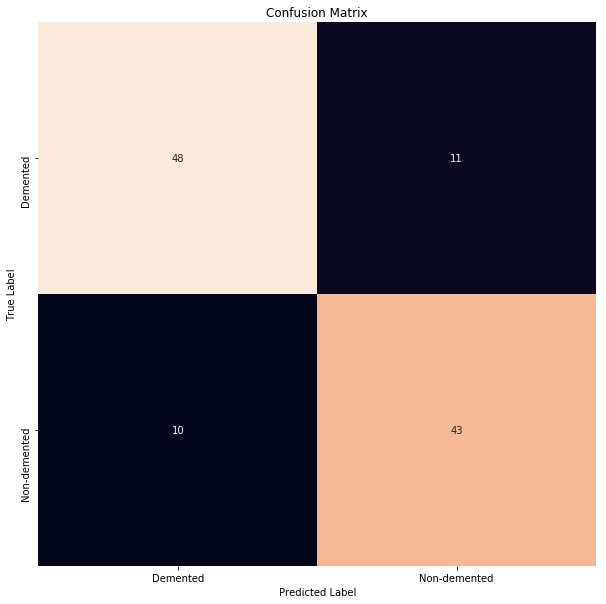

In [35]:
#confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_predicted)
df_cm = pd.DataFrame(cnf_matrix,columns={'Non-demented','Demented'},index={'Non-demented','Demented'})
sb.heatmap(df_cm,annot=True,cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

## Random Forest


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RFModel = RandomForestClassifier(n_estimators=15, max_features=6,max_depth=10,random_state=0).fit(X_train,Y_train)
Y_predicted = RFModel.predict(X_test)
acc = accuracy_score(Y_test,Y_predicted)
recall = recall_score(Y_test,Y_predicted,pos_label=1)
fpr,tpr, thresholds = roc_curve(Y_test,Y_predicted,pos_label=1)
AUC=auc(fpr,tpr)
compare.append(['Random Forest',acc,recall,AUC,fpr,tpr,thresholds])

In [38]:
np.array([RFModel.feature_importances_]).T

array([[0.0837983 ],
       [0.0924164 ],
       [0.05554902],
       [0.34086827],
       [0.08929732],
       [0.19629169],
       [0.11523346],
       [0.02654555]])

In [39]:
np.array([columns]).T

array([['Age'],
       ['EDUC'],
       ['SES'],
       ['MMSE'],
       ['eTIV'],
       ['nWBV'],
       ['ASF'],
       ['Gender']], dtype='<U6')

In [40]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns]).T, np.array([RFModel.feature_importances_]).T)), 
                                columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
3,MMSE,0.340868
5,nWBV,0.196292
6,ASF,0.115233
1,EDUC,0.092416
4,eTIV,0.089297
0,Age,0.083798
2,SES,0.055549
7,Gender,0.026546


Text(0.5, 1.0, 'Confusion Matrix')

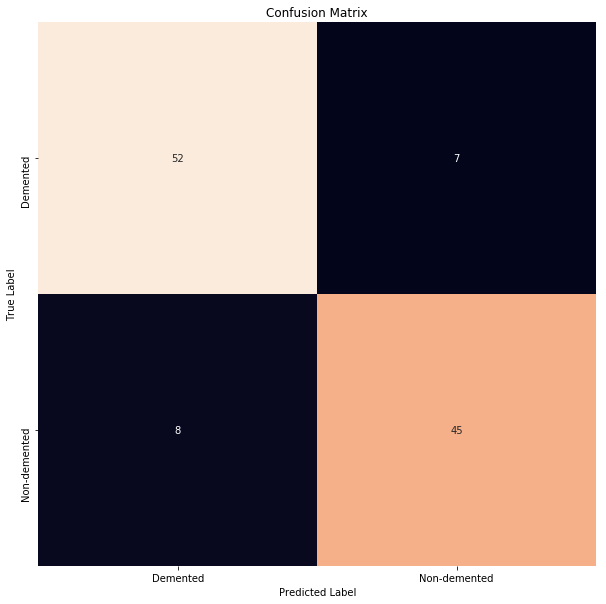

In [41]:
#confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_predicted)
df_cm = pd.DataFrame(cnf_matrix,columns={'Non-demented','Demented'},index={'Non-demented','Demented'})
sb.heatmap(df_cm,annot=True,cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [42]:
compare

[['Logistic Regression',
  0.8125,
  0.8113207547169812,
  0.8124400383754398,
  array([0.        , 0.18644068, 1.        ]),
  array([0.        , 0.81132075, 1.        ]),
  array([2, 1, 0])],
 ['Random Forest',
  0.8660714285714286,
  0.8490566037735849,
  0.8652062679884874,
  array([0.        , 0.11864407, 1.        ]),
  array([0.       , 0.8490566, 1.       ]),
  array([2, 1, 0])]]

In [43]:
compare = pd.DataFrame(data=compare,columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH']);compare

,Model,Accuracy,Recall,AUC,FPR,TPR,TH
0,Logistic Regression,0.812500,0.811321,0.812440,"[0.0, 0.1864406779661017, 1.0]","[0.0, 0.8113207547169812, 1.0]","[2, 1, 0]"
1,Random Forest,0.866071,0.849057,0.865206,"[0.0, 0.11864406779661017, 1.0]","[0.0, 0.8490566037735849, 1.0]","[2, 1, 0]"


## Performing XGBoost

In [44]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import dump_svmlight_file
from sklearn.model_selection import GridSearchCV
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [45]:
# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# use svmlight file for xgboost
dump_svmlight_file(X_train, Y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, Y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

# set xgboost params
param = {
    'n_estimators':1100,
     'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.05,  # the training step for each iteration
    'silent': 1, # logging mode - quiet
    'objective': 'binary:logistic' # error evaluation for multiclass training
#     'min_child_weight':1,
#     'gamma':0.4,
#     'subsample':0.9,
#  'colsample_bytree':0.8
    }  
num_round = 15000  # the number of training iterations

[23:05:30] 261x8 matrix with 2088 entries loaded from dtrain.svm
[23:05:30] 112x8 matrix with 896 entries loaded from dtest.svm


/Users/akshayd/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [46]:
# training and testing - svm file
bst_svm = xgb.train(param, dtrain_svm, num_round)
preds = bst_svm.predict(dtest_svm)

# extracting most confident predictions
best_preds_svm = [round(line) for line in preds]
print("Accuracy",accuracy_score(best_preds_svm,Y_test))
print("Recall",recall_score(best_preds_svm,Y_test))
print("Precision",precision_score(best_preds_svm,Y_test))

Accuracy 0.9017857142857143
Recall 0.9038461538461539
Precision 0.8867924528301887


0.9152542372881356

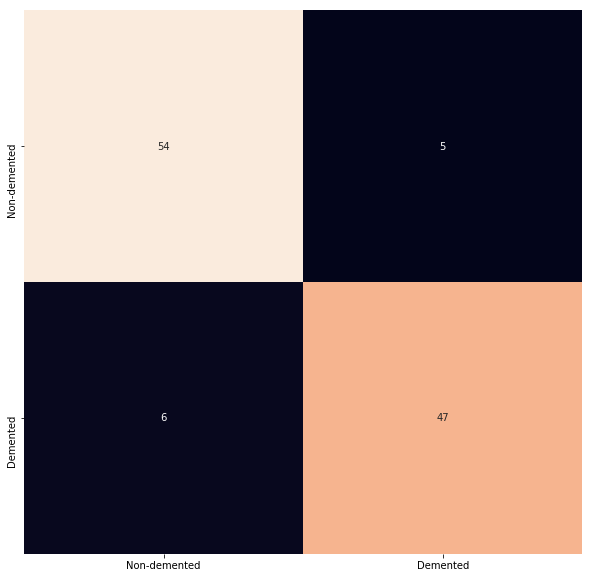

In [47]:
cf = confusion_matrix(Y_test, best_preds_svm)
df_cm = pd.DataFrame(cf,columns=['Non-demented','Demented'],index=['Non-demented','Demented'])
sb.heatmap(df_cm,annot=True,cbar=False)
tn = cf[0][0]
fp = cf[0][1]
fn = cf[1][0]
tp = cf[1][1]
sensitivity= tp/(tp+fn)
specificity = tn/(tn+fp);specificity

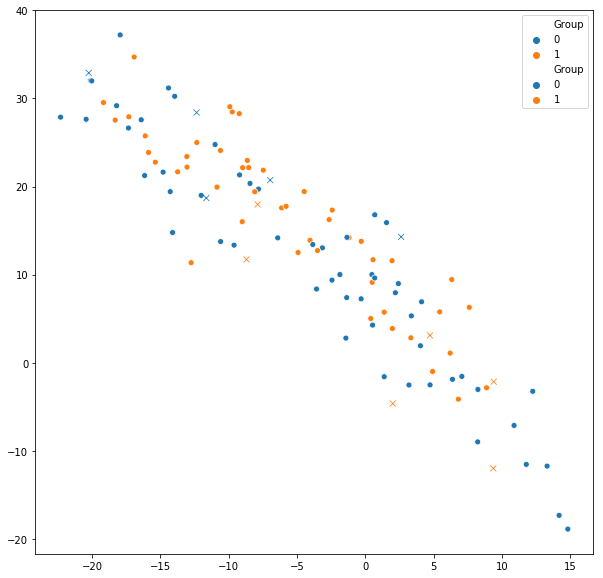

In [48]:
#Creating a scatterplot to distinguish which points are classified correctly and which are not.
#The x marks represents which data points are misrepresented

from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(x_pca) 

xright,yright = X_test[Y_test==best_preds_svm],Y_test[Y_test==best_preds_svm]
xwrong,ywrong = X_test[Y_test!=best_preds_svm],Y_test[Y_test!=best_preds_svm]

X_r = scaler.transform(xright)
X_w = scaler.transform(xwrong)
yoyo_new_right = covar_matrix.transform(X_r)
yoyo_new_wrong = covar_matrix.transform(X_w)

sb.scatterplot(x=yoyo_new_right[:,0],y=yoyo_new_right[:,1],hue = yright)
sb.scatterplot(x=yoyo_new_wrong[:,0],y=yoyo_new_wrong[:,1],hue = ywrong,marker = "x")

In [ ]:
#Other method
# ##fit model no training data
# model = XGBClassifier(learning_rate =0.05,
#  n_estimators=5000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=15,
#  scale_pos_weight=1,
#  seed=27)
# model.fit(X_train, Y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(Y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

### Tuning max_depth and min_child_weight

In [ ]:
param_test1 = {
 'max_depth':range(3,13,2),
 'min_child_weight':range(1,10,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.08, n_estimators=5000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=15, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=2)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_, gsearch1.best_score_

### Tuning gamma

In [ ]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.08, n_estimators=5000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=15, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,Y_train)
gsearch2.best_params_, gsearch1.best_score_

### Tuning subsample and colsample_bytree

In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.08, n_estimators=5000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=15, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.best_params_, gsearch1.best_score_

### Tuning n_estimators

In [ ]:
param_test4 = {
 'n_estimators':[i for i in range(100,10000,500)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.08, n_estimators=5000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=15, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,Y_train)
gsearch4.best_params_, gsearch1.best_score_